# Natural Disasters
https://ourworldindata.org/natural-disasters


## Init Data

In [ ]:
import pandas as pd
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

In [97]:
disasterTypes = ['drought', 'earthquakes', 'disasters', 'volcanic activity', 'floods', 'mass movements', 'storms', 'landslides', 'fog', 'wildfires', 'extreme temperatures', 'glacial lake outbursts']
disasterActions=["Number of deaths from", "Number of people affected from","Number of people left homeless from","Number of people left homeless from","Number of total people affected by", "Reconstruction costs from", "Insured damages against","Total economic damages from", "Death rates from", "Injury rates from" ]
df = pd.read_csv('natural-disasters.csv')
df.head(2000)

,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,Death rates from drought,Injury rates from drought,...,Total economic damages from landslides as a share of GDP,Total economic damages from mass movements as a share of GDP,Total economic damages from storms as a share of GDP,Total economic damages from volcanic activity as a share of GDP,Total economic damages from volcanic activity as a share of GDP.1,Entity,Year,deaths_rate_per_100k_storm,injured_rate_per_100k_storm,total_affected_rate_per_100k_all_disasters
0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,Afghanistan,1950,0.000000,0.000000,2.381236
1,0.0,0.0,4800.0,0,4800.0,0.0,0.0,20.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,Afghanistan,1960,0.000000,0.000000,44.060951
2,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,Afghanistan,1970,0.000000,0.000000,547.029875
3,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,Afghanistan,1980,0.000000,0.000000,218.081859
4,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,Afghanistan,1990,0.006322,0.000000,316.150814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,Zimbabwe,1970,0.017477,0.000000,0.000000
1600,0.0,0.0,0.0,0,0.0,0.0,0.0,100.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,Zimbabwe,1980,0.000000,0.000000,0.000000
1601,0.0,0.0,505500.0,0,505500.0,0.0,0.0,5000.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,Zimbabwe,1990,0.000000,0.000000,4839.765250
1602,0.0,0.0,810000.0,0,810000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.002268,0.0,0.0,Zimbabwe,2000,0.006677,0.000000,7023.254487


## Methods

In [21]:

def getCountriesWithCoordinates():
    df = pd.read_csv(f'./countryCoords.csv')
    return df
    
def getStatisticsForDisaster(disasterName):
    columns = []
    extraColumns=["Entity","Year"]
    for col_name in df.columns:
        if disasterName.lower() in col_name.lower() or col_name in extraColumns:
            columns.append(col_name)
    #print(columns)
    return columns
def getCountries():
    countries = sorted(set(df['Entity']))
    for country in countries:
        #print(country)
        None
    return countries

def getYears():
    years = sorted(set(df['Year']))
    #print(len(years))
    return years

# Get all Disaster of the years for a country
def getAllDisastersForCountry(countries:[]):
    countries:[] = map(str.lower, countries)
    resultDf = df[df['Entity'].str.lower().isin(countries)]
    #resultDf.to_csv(f'./countryData.csv')
    #print(resultDf)
    return resultDf

def getAllDisastersForCountryAndYear(df,countries:[], year):
    countries:[] = map(str.lower, countries)
    resultDf = df[(df['Entity'].str.lower().isin(countries))&(df['Year']==year)]
    resultDf.to_csv(f'./countryData.csv')
    #print(resultDf)
    return resultDf

def getAllDisastersByYear(df,year:int):
    resultDf = df[df['Year'] == year]
    return resultDf

### Get quartile Data

In [4]:
def get_box_plot_data(boxplotDf):
    return boxplotDf.quantile([0.25,0.5,0.75])

### Get Country with Longitude and Latitude

In [ ]:
import numpy as np
def writeCsvCountriesWithCoords():
    data = {'Country':getCountries()}
    #print(data)
    countryDf = pd.DataFrame(data)
    #print(countryDf)

    # declare an empty list to store
    # latitude and longitude of values 
    # of country column
    longitude = []
    latitude = []
    locCountry=[]
    # function to find the coordinate
    # of a given city 
    def findGeocode(country):
        # try and catch is used to overcome
        # the exception thrown by geolocator
        # using geocodertimedout  
        try:
            # Specify the user_agent as your
            # app name it should not be none
            geolocator = Nominatim(user_agent="country_visualizer")
            return geolocator.geocode(country)
        except GeocoderTimedOut:
            print("Geocoder Timed Out...")
            return findGeocode(country)    
    # each value from city column
    # will be fetched and sent to
    # function find_geocode   
    threads=[]
    runIndex = 0
    for i in countryDf["Country"].values:
        if findGeocode(i) is not None:
            loc = findGeocode(i)
            print(f"{runIndex}: {i} - ({loc.latitude}/{loc.longitude})")

            runIndex=runIndex+1
            # coordinates returned from 
            # function is stored into
            # two separate list
            latitude.append(loc.latitude)
            longitude.append(loc.longitude)
            locCountry.append(i)
        # if coordinate for a city not
        # found, insert "NaN" indicating 
        # missing value 
        else:
            latitude.append(np.nan)
            longitude.append(np.nan)

    countryDf["Longitude"] = longitude
    countryDf["Latitude"] = latitude
    countryDf.to_csv(f'./countryCoords.csv')
    
writeCsvCountriesWithCoords()

# Tobias Kast

In [5]:
df.head(10)

,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,Death rates from drought,Injury rates from drought,...,Total economic damages from landslides as a share of GDP,Total economic damages from mass movements as a share of GDP,Total economic damages from storms as a share of GDP,Total economic damages from volcanic activity as a share of GDP,Total economic damages from volcanic activity as a share of GDP.1,Entity,Year,deaths_rate_per_100k_storm,injured_rate_per_100k_storm,total_affected_rate_per_100k_all_disasters
0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,Afghanistan,1950,0.000000,0.000000,2.381236
1,0.0,0.0,4800.0,0,4800.0,0.0,0.0,20.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,Afghanistan,1960,0.000000,0.000000,44.060951
2,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,Afghanistan,1970,0.000000,0.000000,547.029875
3,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,Afghanistan,1980,0.000000,0.000000,218.081859
4,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,Afghanistan,1990,0.006322,0.000000,316.150814
5,3.7,0.0,476000.0,0,476000.0,0.0,0.0,5.0,0.017806,0.0,...,0.000000,0.0,0.008053,0.0,0.0,Afghanistan,2000,0.128209,0.000000,2444.428454
6,0.0,0.0,1525000.0,0,1525000.0,0.0,0.0,14200.0,0.000000,0.0,...,0.001507,0.0,0.000000,0.0,0.0,Afghanistan,2010,0.044311,0.004415,4378.180393
7,1100.0,0.0,0.0,0,0.0,NaN,NaN,NaN,0.832564,0.0,...,NaN,NaN,NaN,NaN,NaN,Africa,1900,0.000000,0.000000,0.000000
8,8500.0,0.0,3200.0,0,3200.0,NaN,NaN,NaN,5.988296,0.0,...,NaN,NaN,NaN,NaN,NaN,Africa,1910,0.000000,0.000000,2.254417
9,2400.0,0.0,0.0,0,0.0,NaN,NaN,NaN,1.544764,0.0,...,NaN,NaN,NaN,NaN,NaN,Africa,1920,0.000000,0.000000,0.000000


Look at the top ten rows of the dataframe.

In [ ]:
df.describe()

with describe we take a look at the quartiles, minimum, maximum and the average value of the many different rows we have

In [ ]:
df.info()

with info i can see how many rows(1604) and columns(171) we have, also i can take a easy look at the dtypes and how many different of them we have in our dataframe.

In [ ]:
df.dtypes

with dtypes i wanted to take a look at the data types of our columns, sadly we have 171 columns and this method wont work well.

In [ ]:
def printNulls():
    nulls = df.isnull().sum().to_frame()
    for index, row in nulls.iterrows():
        print(f'{str(index):70} {str(row[0])}')

i already talked about the big amount of columns we have (171) i wanted to take a look at the sum of nulls we have in these, so i wrote an method to print out the column names with the sum of their null values properly.

In [ ]:
printNulls()

In [ ]:
df.drop(list(df.filter(regex = 'glacial lake outbursts')), axis = 1, inplace = True)

the glacial lake outburst columns are useless for this data frame so i drop it with this regex and the .drop() method.

In [ ]:
df.select_dtypes(include=['float64']).apply(lambda p: df.fillna(0.0, inplace = True))

with this statement i replace all float64 columns which contain null values with 0.0 to make calculations easier.

In [ ]:
df.to_csv(f'./preparedData.csv')

the last step is to safe the changed data frame to a new .csv so we can continue working with the prepared data.

# Markus Hattmannsdorfer

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df_deaths_by_incident = df
df_deaths_by_incident = df.loc[:,["Number of deaths from drought","Number of deaths from earthquakes", "Number of deaths from disasters","Number of deaths from volcanic activity","Number of deaths from floods","Number of deaths from mass movements","Number of deaths from storms","Number of deaths from landslides","Number of deaths from fog","Number of deaths from wildfires","Number of deaths from extreme temperatures", "Year"]]
df_deaths_by_incident.describe()

# Lineplots of total Deaths per Disaster

In [ ]:
from ipywidgets import interact, widgets

def displayDisasterActions(action):
    for disaster in disasterTypes:
        if disaster != "glacial lake outbursts":
            
            columnName = ' '.join([action,disaster])
            ax=sns.barplot(data=df, x="Year", y=columnName, ci=None)
            ax.set_title(disaster)
            plt.figure()
        
interact(displayDisasterActions, 
         action=widgets.Dropdown(
            options=disasterActions,
            value=disasterActions[0],
            description='Disaster Action:',
            disabled=False,
            ))

# All Deaths, group by Sum

In [ ]:
deaths_drought = df_deaths_by_incident["Number of deaths from drought"].sum()
deaths_disasters = df_deaths_by_incident["Number of deaths from disasters"].sum()
deaths_volcanic_activity = df_deaths_by_incident["Number of deaths from volcanic activity"].sum()
deaths_floods = df_deaths_by_incident["Number of deaths from floods"].sum()
deaths_mass_movements = df_deaths_by_incident["Number of deaths from mass movements"].sum()
deaths_storms = df_deaths_by_incident["Number of deaths from storms"].sum()
deaths_landslides = df_deaths_by_incident["Number of deaths from landslides"].sum()
deaths_wildfires = df_deaths_by_incident["Number of deaths from wildfires"].sum()
deaths_fog = df_deaths_by_incident["Number of deaths from fog"].sum()
df_total_deaths = pd.DataFrame(
    {"Disasters" : ["drought", "disasters", "volcanic_activity", "floods", "mass_movements", "storms", "landslides", "wildfires", "fog"], 
     "Deaths" : [deaths_drought, deaths_disasters, deaths_volcanic_activity, deaths_floods, deaths_mass_movements, deaths_storms, deaths_landslides, deaths_wildfires, deaths_fog]
    }
)


fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_total_deaths["Disasters"],df_total_deaths["Deaths"])
plt.show()

# Marc Kruiß

### little test for the getAllDisasteryByYear

In [6]:

countriesDisasters = getAllDisastersForCountry(['Austria'])
getAllDisastersByYear(countriesDisasters, 2010)

,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,Death rates from drought,Injury rates from drought,...,Total economic damages from landslides as a share of GDP,Total economic damages from mass movements as a share of GDP,Total economic damages from storms as a share of GDP,Total economic damages from volcanic activity as a share of GDP,Total economic damages from volcanic activity as a share of GDP.1,Entity,Year,deaths_rate_per_100k_storm,injured_rate_per_100k_storm,total_affected_rate_per_100k_all_disasters
115,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000029,0.0,0.0,Austria,2010,0.017953,0.136054,0.607904


### compare 2 countries with a action+disaster

In [7]:
from ipywidgets import interact, widgets
import urllib
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

def displayComparison(country_one, country_two,disasterName,actionName,year):
    targetColumn = " ".join([actionName, disasterName])
    try:
        countriesDisasters = getAllDisastersForCountry([country_one, country_two])
        countriesYearDisasters=getAllDisastersByYear(countriesDisasters,year)
        sns.barplot(data=countriesYearDisasters, x="Entity",y=targetColumn)
        plt.show()
    except Exception as e:
        print(e)
    

print(getYears())
interact(displayComparison, 
         country_one=getCountries(),
         country_two=getCountries(), 
         disasterName=widgets.Dropdown(
            options=disasterTypes,
            value='wildfires',
            description='Disaster Type:',
            disabled=False,
            ),
         actionName=widgets.Dropdown(
            options=disasterActions,
            value=disasterActions[0],
            description='Disaster Action:',
            disabled=False,
            ),
         year=widgets.IntSlider(min=getYears()[0], max=getYears()[-1], step=10, value=getYears()[-1]))

[1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]


interactive(children=(Dropdown(description='country_one', options=('Afghanistan', 'Africa', 'Albania', 'Algeri…

<function __main__.displayComparison(country_one, country_two, disasterName, actionName, year)>

### select action with disaster and display each country

In [8]:
from ipywidgets import interact, widgets
import urllib
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

global representiveColumn
representiveColumn="deaths_rate_per_100k_storm"

def displayComparison(year, charRange, minValue, disasterName,actionName):
    representiveColumn=" ".join([actionName,disasterName])
    countries = getCountries()
    print(charRange)
    print(minValue)
    try:
        countriesDisasters = getAllDisastersForCountry(countries)
        countriesYearDisasters=getAllDisastersByYear(countriesDisasters,year)
        
        countriesYearDisasters = countriesYearDisasters.drop(countriesYearDisasters.loc
              [
                  (countriesYearDisasters[representiveColumn] < minValue)|
                  (countriesYearDisasters["Entity"].str[0]<chr(charRange[0]))|
                  (chr(charRange[1])<countriesYearDisasters["Entity"].str[0])
                   ]
                   .index)
        currentMax = countriesYearDisasters[representiveColumn].max()
        print("Current max: "+str(currentMax))
        plt.figure(figsize=(20,10))
        sns.set(font_scale = 1)
        sns.barplot(data=countriesYearDisasters, x="Entity",y=representiveColumn)
        plt.xticks(rotation=90)
        plt.show()
    except Exception as e:
        print("Exception: "+str(e))
    

valueMax=getAllDisastersForCountry(getCountries())[representiveColumn].max()

interact(displayComparison, 
         year=widgets.IntSlider(min=getYears()[0], max=getYears()[-1], step=10, value=getYears()[-1]),
        charRange=widgets.IntRangeSlider(
            value=[ord('A'),ord('Z')],
            min=ord('A'),
            max=ord('Z'),
            step=1,
            description='Char-Range:',
            disabled=False,
            continuous_update=False,
            orientation='horizontal',
            readout=True,
            readout_format='d'),
         minValue=widgets.FloatSlider(
            value=0,
            min=0,
            max=valueMax,
            step=0.1,
            description='Min Value: ',
            disabled=False,
            continuous_update=False,
            orientation='vertical',
            readout=True,
            readout_format='.1f'),
         disasterName=widgets.Dropdown(
            options=disasterTypes,
            value='wildfires',
            description='Disaster Type:',
            disabled=False,
            ),
         
         actionName=widgets.Dropdown(
            options=disasterActions,
            value=disasterActions[0],
            description='Disaster Action:',
            disabled=False,
            )
        )

interactive(children=(IntSlider(value=2010, description='year', max=2010, min=1900, step=10), IntRangeSlider(v…

<function __main__.displayComparison(year, charRange, minValue, disasterName, actionName)>

<AxesSubplot:xlabel='Entity', ylabel='deaths_rate_per_100k_storm'>

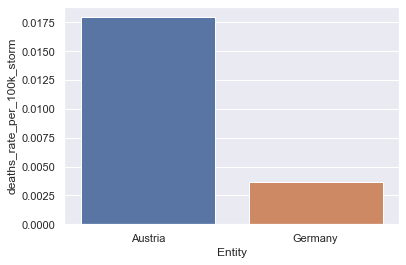

In [9]:
countriesDisasters = getAllDisastersForCountry(['Austria', 'Germany'])
countriesYearDisasters=getAllDisastersByYear(countriesDisasters,2010)
sns.barplot(data=countriesYearDisasters, x="Entity",y="deaths_rate_per_100k_storm")


## Map Visualization
#### Number of deaths from disasters

In [10]:
def color_producer(value, q1, q3):
    if value < q1:
        return 'green'
    elif q1 <= value <= q3:
        return 'orange'
    else:
        return 'red'

from random import seed
from random import randint
seed(1)

countryValueCoordDf = getCountriesWithCoordinates()
values=[]
targetValueColumn="Number of deaths from disasters"
year = 2010
for item in range(len(countryValueCoordDf)):
    currentCountry=countryValueCoordDf['Country'][item]
    currentValue=0
    try:
        currentValue=df.loc[(df['Entity']==currentCountry)&(df['Year']==year)][targetValueColumn].values[0]
        #print(currentCountry+": "+str(currentValue))
    except:
        #print('No Value for '+currentCountry)
        None
    values.append(currentValue)
    
#print("Values: "+ str(len(values)))
countryValueCoordDf["Value"]=values
#print(countryValueCoordDf)

# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster
import math
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
boxplot=get_box_plot_data(countryValueCoordDf['Value'])
print(boxplot)
q1 = boxplot[0.25]
q3 = boxplot[0.75]
print(q1)
print(q3)

#print("Min: "+ str(minValue)+" , Max: "+str(maxValue))
for i in range(len(countryValueCoordDf)):
        lat = countryValueCoordDf.iloc[i]['Latitude']
        long = countryValueCoordDf.iloc[i]['Longitude']
        radius=5
        currentValue = countryValueCoordDf.iloc[i]['Value']
        popup_text = """ <b>Country: </b> {}<br>
                     <b>Value: </b> {}<br>"""
        popup_text = popup_text.format(countryValueCoordDf.iloc[i]['Country'],
                                   currentValue)
        
        currentColor = color_producer(currentValue, q1, q3)
        #print(str(currentValue) + ": "+ str(currentColor))
        if not math.isnan(lat) and not math.isnan(long):
            folium.CircleMarker(location = [lat, long], 
                                radius=radius, 
                                popup=popup_text, 
                                fill=True, 
                                color=currentColor).add_to(marker_cluster)
#show the map
world_map

0.25     0.40
0.50     5.25
0.75    40.20
Name: Value, dtype: float64
0.4
40.2


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
# sample data
def displayPie(year, disaster):
    disasterColumn = "Number of deaths from "+disaster
    pieDf = pd.read_csv('preparedData.csv')
    #print(pieDf)
    try:
        pieDf=getAllDisastersForCountryAndYear(pieDf,['Australia','Europe','Asia','Africa','South America','North America'], year)
        pieDf.groupby(['Entity']).sum().plot(kind='pie', y=disasterColumn, title=disasterColumn, figsize=(20,10))
    except:
        print("Keine Daten vorhanden!")

interact(displayPie,
         disaster=widgets.Dropdown(
            options=disasterTypes,
            value='wildfires',
            description='Disaster Type:',
            disabled=False,
            ),
         year=widgets.IntSlider(min=getYears()[0], max=getYears()[-1], step=10, value=getYears()[-1]))


interactive(children=(IntSlider(value=2010, description='year', max=2010, min=1900, step=10), Dropdown(descrip…

<function __main__.displayPie(year, disaster)>

## HeatMap

     Unnamed: 0         Country   Longitude   Latitude    Value
0             0     Afghanistan   66.238514  33.768006    263.1
1             1          Africa   17.757812  11.502434   3283.3
2             2         Albania   19.999962  41.000028      6.6
3             3         Algeria    2.999983  28.000027     11.1
4             4  American Samoa -170.692511 -14.289304      0.0
..          ...             ...         ...        ...      ...
221         221           World  135.770280  35.004274  45260.2
222         222           Yemen   47.891527  16.347124     25.3
223         223      Yugoslavia  -81.526142  23.041237      0.0
224         224          Zambia   27.558988 -14.518912      1.3
225         225        Zimbabwe   29.746841 -18.455496    108.5

[226 rows x 5 columns]


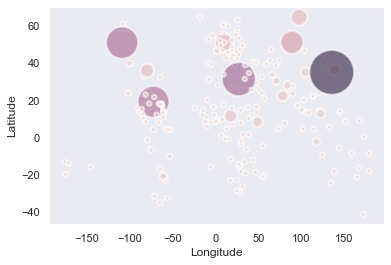

In [12]:
# libraries
import matplotlib.pyplot as plt
import seaborn as sns
#from gapminder import gapminder # data set

# data
sns.set_style("dark")

data = countryValueCoordDf
print(data)
# use the scatterplot function to build the bubble map
sns.scatterplot(data=data, x="Longitude", y="Latitude", size="Value", legend=False, sizes=(20, 2000),cmap="Accent", 
    alpha=0.6, 
    edgecolors="white", 
    linewidth=2,
               color="red",
               hue="Value")

# show the graph
plt.show()

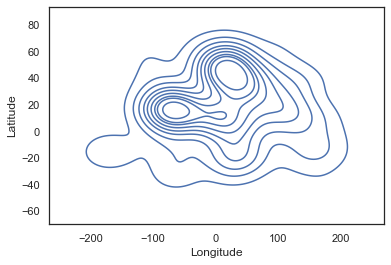

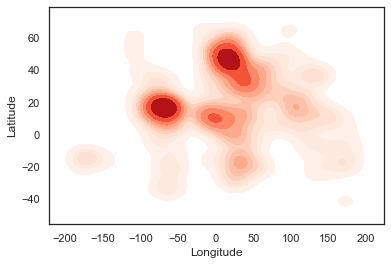

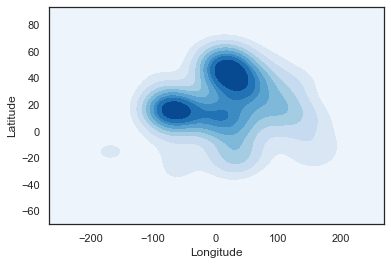

In [13]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
df = countryValueCoordDf
 
# set seaborn style
sns.set_style("white")

# Basic 2D density plot
sns.kdeplot(x=df.Longitude, y=df.Latitude)
plt.show()
 
# Custom the color, add shade and bandwidth
sns.kdeplot(x=df.Longitude, y=df.Latitude, cmap="Reds", shade=True, bw_adjust=.5)
plt.show()

# Add thresh parameter
sns.kdeplot(x=df.Longitude, y=df.Latitude, cmap="Blues", shade=True, thresh=0)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

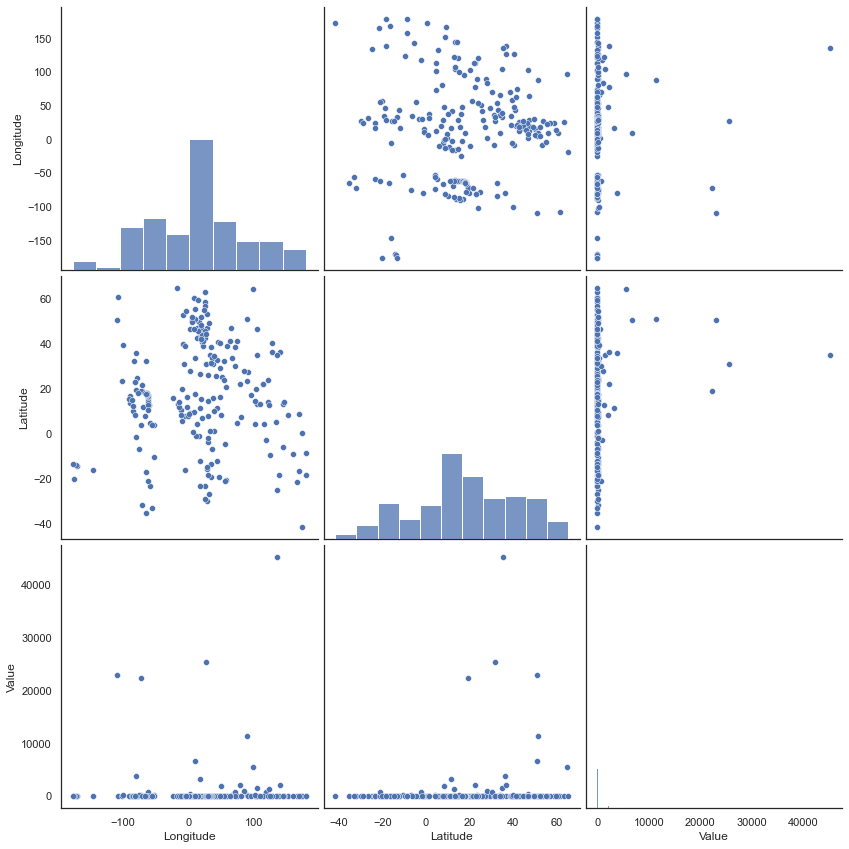

In [28]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
df = countryValueCoordDf


plot = sns.pairplot(df[['Longitude','Latitude','Value']], height=4.0)
plt.show